In [10]:
# Install required library (already available on Google Colab, but here for completeness)
!pip install tensorflow-datasets

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [12]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [13]:
dataset, info = tfds.load('eurosat', with_info=True, as_supervised=True)
train_data, test_data = dataset['train'].take(20000), dataset['train'].skip(20000)


In [14]:
IMG_SIZE = 64
BATCH_SIZE = 32

In [15]:
train_data = train_data.map(lambda x, y: (tf.image.convert_image_dtype(x, tf.float32), y))
test_data = test_data.map(lambda x, y: (tf.image.convert_image_dtype(x, tf.float32), y))


In [16]:
train_data = train_data.shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_data = test_data.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [17]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [19]:
# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [20]:
# Train model
history = model.fit(train_data, validation_data=test_data, epochs=20, callbacks=[early_stop])

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 137s 215ms/step - accuracy: 0.4007 - loss: 1.5569 - val_accuracy: 0.6929 - val_loss: 0.8722
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 126s 201ms/step - accuracy: 0.6746 - loss: 0.8999 - val_accuracy: 0.7203 - val_loss: 0.7736
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 131s 210ms/step - accuracy: 0.7479 - loss: 0.7044 - val_accuracy: 0.7833 - val_loss: 0.6157
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 122s 194ms/step - accuracy: 0.7764 - loss: 0.6338 - val_accuracy: 0.7979 - val_loss: 0.5687
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 123s 197ms/step - accuracy: 0.7977 - loss: 0.5530 - val_accuracy: 0.7800 - val_loss: 0.6185
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 151s 211ms/step - accuracy: 0.8136 - loss: 0.5152 - val_accuracy: 0.8199 - val_loss: 0.5006
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 132s 195ms/step - accuracy: 0.8319 - loss: 0.4681 - val_accuracy: 0.8291 - val_loss: 0.4792
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 122s 195ms/step - accuracy: 0.8487 -

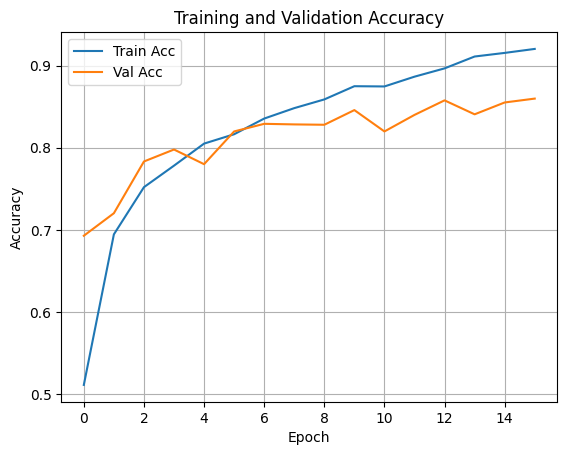

In [21]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.grid(True)
plt.show()

In [22]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_data)
print("Test Accuracy:", test_acc)


219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.8595 - loss: 0.4395
Test Accuracy: 0.8577142953872681
